In [68]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv('arts_fest_dataset.csv')

# Step 2: Feature Engineering
# Assume 'event' and 'district' are relevant features
X = data[['Event', 'District']]
y = data['Result']

# One-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Step 3: Model Training
model = RandomForestClassifier()  # You can try different algorithms here

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Prediction
def predict_district_probabilities(event):
    # Generate input data for all districts
    districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam',
                 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode',
                 'Wayanad', 'Kannur', 'Kasaragod']
    input_data = [[event, district] for district in districts]
    input_encoded = encoder.transform(input_data)
    
    # Predict probabilities for each district
    probabilities = model.predict_proba(input_encoded)
    
    # Extract probabilities of winning the first position
    first_position_probs = probabilities[:, 0]  # Assuming 'First' is the first position
    
    # Create a dictionary with district names and corresponding probabilities
    district_probabilities = dict(zip(districts, first_position_probs))
    
    return district_probabilities

# Example usage:
item = 'Classical Music'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")


Accuracy: 0.3842364532019704
Predicted probabilities of winning First position for Classical Music in each district:
Thiruvananthapuram: 0.01875
Kollam: 0.5832757797757797
Alappuzha: 0.0
Pathanamthitta: 0.5820726773226773
Kottayam: 0.0
Idukki: 0.0125
Ernakulam: 0.467031746031746
Thrissur: 0.04083333333333334
Palakkad: 0.5751073093573096
Malappuram: 0.47308333333333313
Kozhikode: 0.2432738095238095
Wayanad: 0.015
Kannur: 0.23606168831168822
Kasaragod: 0.17668253968253964


In [3]:
list(data.columns)

['Event', 'Year', 'Result', 'Gender', 'District']

In [4]:
features=['Event', 'Year', 'Result', 'Gender']

In [5]:
data['District'].value_counts()

Kollam                85
Palakkad              83
Idukki                83
Thiruvananthapuram    82
Alappuzha             74
Kannur                73
Pathanamthitta        71
Kottayam              71
Malappuram            70
Thrissur              69
Ernakulam             66
Kozhikode             63
Wayanad               62
Kasaragod             62
Name: District, dtype: int64

In [6]:
data['Event'].value_counts()

Mimicry            78
Mono Act           78
Light Music        78
Classical Music    78
Group Dance        78
Fancy Dress        78
Folk Dance         78
Story Telling      39
Painting           39
Clay Modeling      39
Recitation         39
Drama              39
Quiz               39
Mohiniyattam       39
Debate             39
Cartoon            39
Essay Writing      39
Mime               39
Thiruvathira       39
Name: Event, dtype: int64

In [7]:
import matplotlib.pyplot as plt

labels = ['Light Music', 'Fancy Dress', 'Folk Dance', 'Group Dance', 'Classical Music', 'Mimicry', 'Mono Act', 'Cartoon', 'Painting', 'Debate', 'Essay Writing', 'Clay Modeling', 'Mime', 'Mohiniyattam', 'Quiz', 'Thiruvathira', 'Drama', 'Recitation', 'Story Telling']
sizes = [78, 78, 78, 78, 78, 78, 78, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]
colors = ['lightskyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightblue', 'lightgrey', 'orange', 'yellow', 'green', 'blue', 'red', 'purple', 'cyan', 'magenta', 'brown', 'black', 'grey', 'navy']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


<Figure size 640x480 with 1 Axes>

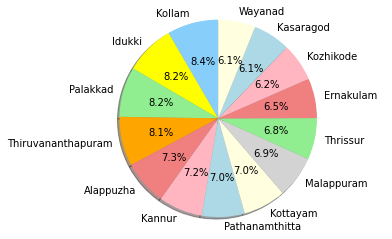

In [8]:
import matplotlib.pyplot as plt

labels = ['Kollam', 'Idukki', 'Palakkad', 'Thiruvananthapuram', 'Alappuzha', 'Kannur', 'Pathanamthitta', 'Kottayam', 'Malappuram', 'Thrissur', 'Ernakulam', 'Kozhikode', 'Kasaragod', 'Wayanad']
sizes = [85, 83, 83, 82, 74, 73, 71, 71, 70, 69, 66, 63, 62, 62]
colors = ['lightskyblue', 'yellow', 'lightgreen', 'orange', 'lightcoral', 'lightpink', 'lightblue', 'lightyellow', 'lightgrey', 'lightgreen', 'lightcoral', 'lightpink', 'lightblue', 'lightyellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()


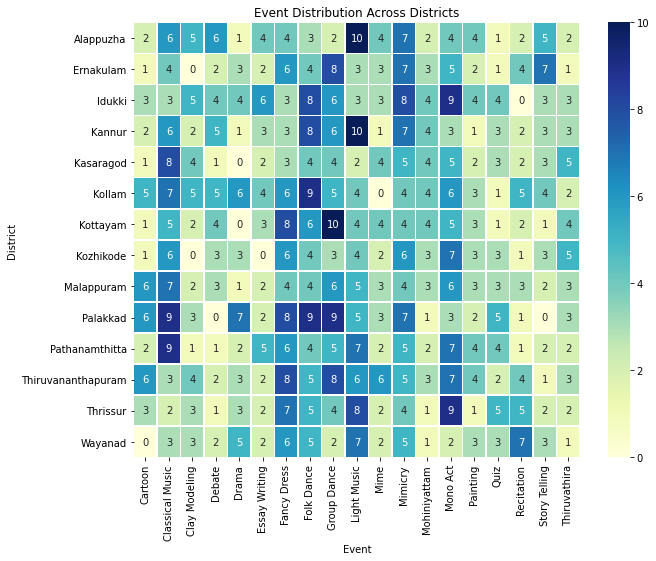

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the relevant data

# Create a pivot table to aggregate the counts of events for each district
pivot_table = data.pivot_table(index='District', columns='Event', aggfunc='size', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Event Distribution Across Districts')
plt.xlabel('Event')
plt.ylabel('District')
plt.show()


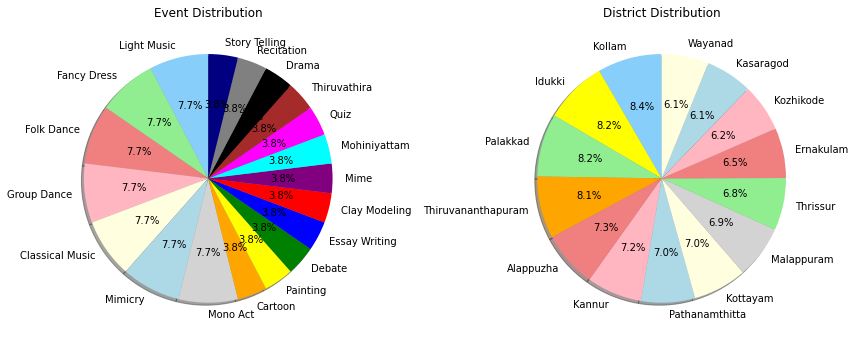

In [10]:
import matplotlib.pyplot as plt

# Data for the first pie chart
labels1 = ['Light Music', 'Fancy Dress', 'Folk Dance', 'Group Dance', 'Classical Music', 'Mimicry', 'Mono Act', 'Cartoon', 'Painting', 'Debate', 'Essay Writing', 'Clay Modeling', 'Mime', 'Mohiniyattam', 'Quiz', 'Thiruvathira', 'Drama', 'Recitation', 'Story Telling']
sizes1 = [78, 78, 78, 78, 78, 78, 78, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]
colors1 = ['lightskyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightblue', 'lightgrey', 'orange', 'yellow', 'green', 'blue', 'red', 'purple', 'cyan', 'magenta', 'brown', 'black', 'grey', 'navy']

# Data for the second pie chart
labels2 = ['Kollam', 'Idukki', 'Palakkad', 'Thiruvananthapuram', 'Alappuzha', 'Kannur', 'Pathanamthitta', 'Kottayam', 'Malappuram', 'Thrissur', 'Ernakulam', 'Kozhikode', 'Kasaragod', 'Wayanad']
sizes2 = [85, 83, 83, 82, 74, 73, 71, 71, 70, 69, 66, 63, 62, 62]
colors2 = ['lightskyblue', 'yellow', 'lightgreen', 'orange', 'lightcoral', 'lightpink', 'lightblue', 'lightyellow', 'lightgrey', 'lightgreen', 'lightcoral', 'lightpink', 'lightblue', 'lightyellow']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first pie chart
axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', colors=colors1, shadow=True, startangle=90)
axs[0].set_title('Event Distribution')

# Plotting the second pie chart
axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors2, shadow=True, startangle=90)
axs[1].set_title('District Distribution')

plt.tight_layout()

# Save the figure
plt.savefig('pie_charts_comparison.png')
plt.show()


In [11]:
item = 'Classical Music'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Classical Music in each district:
Thiruvananthapuram: 0.03583333333333333
Kollam: 0.6300364912864912
Alappuzha: 0.01
Pathanamthitta: 0.5633389943389945
Kottayam: 0.004166666666666667
Idukki: 0.014285714285714284
Ernakulam: 0.4414444444444445
Thrissur: 0.028452380952380955
Palakkad: 0.5700277777777776
Malappuram: 0.48833333333333323
Kozhikode: 0.2857391774891776
Wayanad: 0.014702380952380953
Kannur: 0.15145310245310245
Kasaragod: 0.19781024531024527


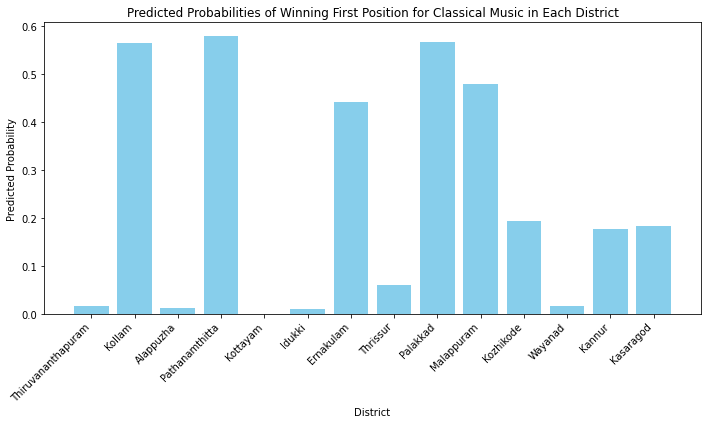

In [12]:
import matplotlib.pyplot as plt

districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.017, 0.5658010323010324, 0.013333333333333332, 0.5793117993117992, 0.0, 0.01, 0.4424157509157509, 0.06078571428571428, 0.5673553391053392, 0.48001190476190475, 0.1934404761904762, 0.017750000000000002, 0.1766479076479076, 0.18371717171717175]

plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='skyblue')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Classical Music in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Classical_Music.png')
plt.show()


In [13]:
#'Light Music', 'Fancy Dress', 'Folk Dance', 'Group Dance', 'Mimicry', 'Mono Act', 'Cartoon', 'Painting', 'Debate', 'Essay Writing', 'Clay Modeling', 'Mime', 'Mohiniyattam', 'Quiz', 'Thiruvathira', 'Drama', 'Recitation', 'Story Telling'
item = 'Light Music'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")


Predicted probabilities of winning First position for Light Music in each district:
Thiruvananthapuram: 0.3352186147186147
Kollam: 0.4090714285714286
Alappuzha: 0.7376892649833823
Pathanamthitta: 0.20319552669552673
Kottayam: 0.32654112554112547
Idukki: 0.028314935064935064
Ernakulam: 0.0775
Thrissur: 0.4905581640581642
Palakkad: 0.5246998556998558
Malappuram: 0.40611507936507957
Kozhikode: 0.09176767676767676
Wayanad: 0.432203823953824
Kannur: 0.15516089466089464
Kasaragod: 0.14815151515151517


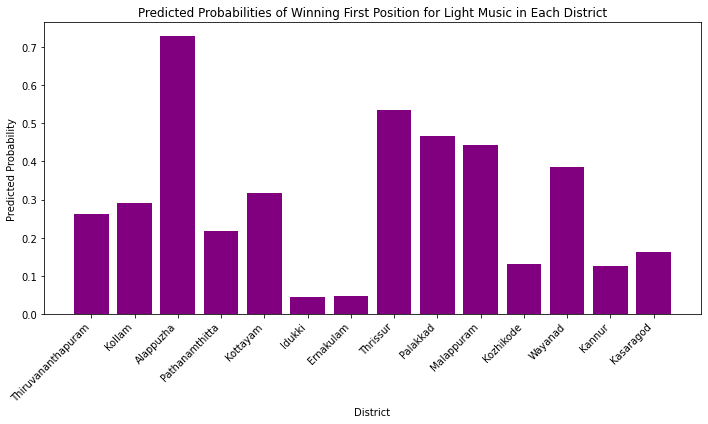

In [64]:
import matplotlib.pyplot as plt

districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.26218650793650783, 0.2921190476190476, 0.7275749759356565, 0.21739033189033186, 0.31811111111111107, 0.046071428571428576, 0.048, 0.5338840742590742, 0.467452380952381, 0.4422539682539683, 0.13028751803751804, 0.3848748196248197, 0.12698615273615277, 0.16156926406926406]

plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='purple')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Light Music in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_light_music.png')

# Show the plot
plt.show()


In [15]:
item = 'Fancy Dress'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")


Predicted probabilities of winning First position for Fancy Dress in each district:
Thiruvananthapuram: 0.4162179487179487
Kollam: 0.46778968253968245
Alappuzha: 0.7179325396825397
Pathanamthitta: 0.0
Kottayam: 0.12531056688409617
Idukki: 0.9583333333333333
Ernakulam: 0.24572619047619043
Thrissur: 0.20657215007215002
Palakkad: 0.0
Malappuram: 0.050499999999999996
Kozhikode: 0.40698737373737404
Wayanad: 0.2408849206349206
Kannur: 0.6427499999999999
Kasaragod: 0.9892857142857143


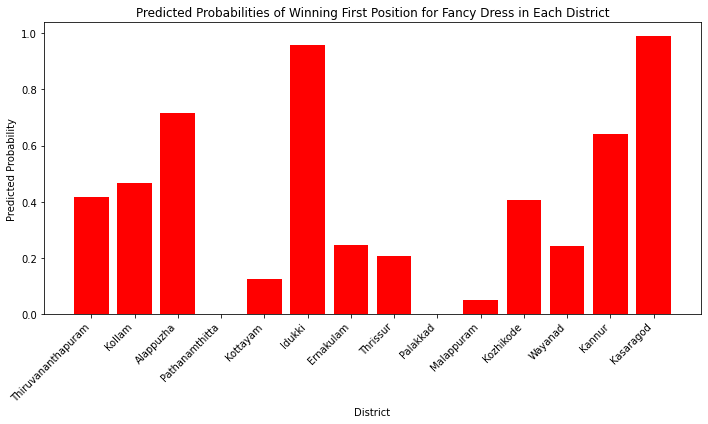

In [65]:
import matplotlib.pyplot as plt

district_probabilities = {
    'Thiruvananthapuram': 0.4162179487179487,
    'Kollam': 0.46778968253968245,
    'Alappuzha': 0.7179325396825397,
    'Pathanamthitta': 0.0,
    'Kottayam': 0.12531056688409617,
    'Idukki': 0.9583333333333333,
    'Ernakulam': 0.24572619047619043,
    'Thrissur': 0.20657215007215002,
    'Palakkad': 0.0,
    'Malappuram': 0.050499999999999996,
    'Kozhikode': 0.40698737373737404,
    'Wayanad': 0.2408849206349206,
    'Kannur': 0.6427499999999999,
    'Kasaragod': 0.9892857142857143
}

districts = list(district_probabilities.keys())
probabilities = list(district_probabilities.values())

plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='red')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Fancy Dress in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('fancy_dress.png')

# Show the plot
plt.show()


In [17]:
item = 'Folk Dance'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Folk Dance in each district:
Thiruvananthapuram: 0.5837539682539681
Kollam: 0.383248321123321
Alappuzha: 0.3863809523809525
Pathanamthitta: 0.5362738095238094
Kottayam: 0.38325296925296937
Idukki: 0.29106329781329776
Ernakulam: 0.7725992063492062
Thrissur: 0.28368650793650785
Palakkad: 0.14667568542568535
Malappuram: 0.009333333333333334
Kozhikode: 0.32872222222222214
Wayanad: 0.19998809523809513
Kannur: 0.379038628038628
Kasaragod: 0.00375


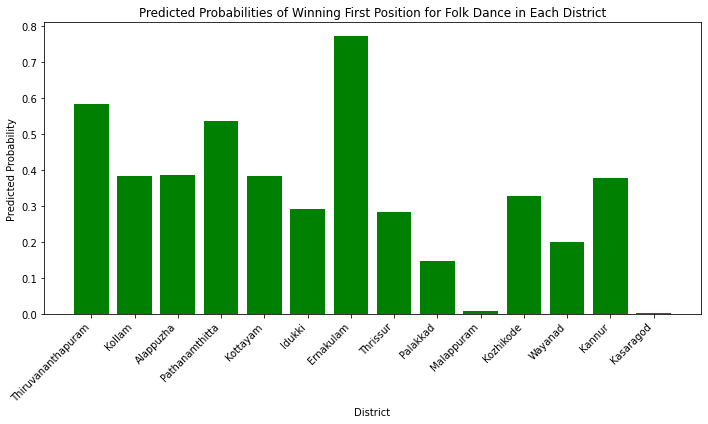

In [66]:
import matplotlib.pyplot as plt

# Example data
district_probabilities = {
    'Thiruvananthapuram': 0.5837539682539681,
    'Kollam': 0.383248321123321,
    'Alappuzha': 0.3863809523809525,
    'Pathanamthitta': 0.5362738095238094,
    'Kottayam': 0.38325296925296937,
    'Idukki': 0.29106329781329776,
    'Ernakulam': 0.7725992063492062,
    'Thrissur': 0.28368650793650785,
    'Palakkad': 0.14667568542568535,
    'Malappuram': 0.009333333333333334,
    'Kozhikode': 0.32872222222222214,
    'Wayanad': 0.19998809523809513,
    'Kannur': 0.379038628038628,
    'Kasaragod': 0.00375
}

districts = list(district_probabilities.keys())
probabilities = list(district_probabilities.values())

plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='green')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Folk Dance in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('folk_dance.png')

# Show the plot
plt.show()


In [22]:
item = 'Group Dance'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Group Dance in each district:
Thiruvananthapuram: 0.6454826839826839
Kollam: 0.46176190476190476
Alappuzha: 0.08641269841269841
Pathanamthitta: 0.4932380952380953
Kottayam: 0.37776491563991554
Idukki: 0.1764303751803751
Ernakulam: 0.1342461149961149
Thrissur: 0.3862142857142858
Palakkad: 0.12316891441891435
Malappuram: 0.4618470418470419
Kozhikode: 0.3216309523809523
Wayanad: 0.04078571428571429
Kannur: 0.2650515873015872
Kasaragod: 0.90975


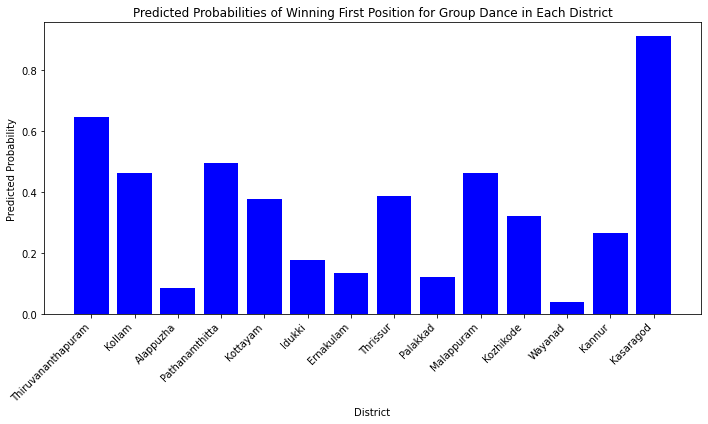

In [67]:
import matplotlib.pyplot as plt

# Example data
district_probabilities = {
    'Thiruvananthapuram': 0.6454826839826839,
    'Kollam':  0.46176190476190476,
    'Alappuzha': 0.08641269841269841,
    'Pathanamthitta': 0.4932380952380953,
    'Kottayam': 0.37776491563991554,
    'Idukki': 0.1764303751803751,
    'Ernakulam': 0.1342461149961149,
    'Thrissur': 0.3862142857142858,
    'Palakkad': 0.12316891441891435,
    'Malappuram': 0.4618470418470419,
    'Kozhikode': 0.3216309523809523,
    'Wayanad': 0.04078571428571429,
    'Kannur': 0.2650515873015872,
    'Kasaragod': 0.90975
}

districts = list(district_probabilities.keys())
probabilities = list(district_probabilities.values())

plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='blue')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Group Dance in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Group_Dance.png')

# Show the plot
plt.show()


In [25]:
item = 'Mimicry'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Mimicry in each district:
Thiruvananthapuram: 0.1799112554112554
Kollam: 0.992
Alappuzha: 0.16931562881562884
Pathanamthitta: 0.2314682539682539
Kottayam: 0.2750465367965366
Idukki: 0.40436038961038956
Ernakulam: 0.8027103174603174
Thrissur: 0.3651190476190475
Palakkad: 0.17953679653679655
Malappuram: 0.2529484126984127
Kozhikode: 0.13823989898989894
Wayanad: 0.23976190476190473
Kannur: 0.17271645021645018
Kasaragod: 0.013999999999999999


In [26]:
item = 'Mono Act'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Mono Act in each district:
Thiruvananthapuram: 0.517361111111111
Kollam: 0.2171118326118325
Alappuzha: 0.26577380952380947
Pathanamthitta: 0.6686726606726608
Kottayam: 0.2010717893217893
Idukki: 0.13380747030747026
Ernakulam: 0.7298452380952378
Thrissur: 0.3504227716727716
Palakkad: 0.013333333333333332
Malappuram: 0.3073906926406925
Kozhikode: 0.0
Wayanad: 0.9039999999999999
Kannur: 0.10765909090909091
Kasaragod: 0.4848571428571429


In [27]:
item = 'Cartoon'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Cartoon in each district:
Thiruvananthapuram: 0.3106190476190476
Kollam: 0.33021428571428557
Alappuzha: 0.6646428571428571
Pathanamthitta: 0.532
Kottayam: 0.29772763347763337
Idukki: 0.10810317460317459
Ernakulam: 0.16928571428571432
Thrissur: 0.3754047619047619
Palakkad: 0.2031706349206349
Malappuram: 0.3061717171717171
Kozhikode: 0.10772222222222223
Wayanad: 0.28263095238095237
Kannur: 0.14983766233766235
Kasaragod: 0.16156349206349205


In [28]:
item = 'Painting'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Painting in each district:
Thiruvananthapuram: 0.05466666666666667
Kollam: 0.35710714285714296
Alappuzha: 0.653781746031746
Pathanamthitta: 0.0
Kottayam: 0.34175
Idukki: 0.02625
Ernakulam: 0.8884404761904762
Thrissur: 0.7642380952380953
Palakkad: 0.010428571428571428
Malappuram: 0.45807575757575747
Kozhikode: 0.10984956709956709
Wayanad: 0.621
Kannur: 0.07763528138528138
Kasaragod: 0.07416666666666667


In [29]:
item = 'Debate'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Debate in each district:
Thiruvananthapuram: 0.15636904761904763
Kollam: 0.5845277777777779
Alappuzha: 0.0075
Pathanamthitta: 0.33785173160173165
Kottayam: 0.7620714285714285
Idukki: 0.4707976190476191
Ernakulam: 0.06395238095238094
Thrissur: 0.15592857142857144
Palakkad: 0.2415039682539682
Malappuram: 0.45783333333333337
Kozhikode: 0.11216666666666665
Wayanad: 0.4678333333333333
Kannur: 0.4993568376068375
Kasaragod: 0.7095714285714285


In [30]:
item = 'Essay Writing'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Essay Writing in each district:
Thiruvananthapuram: 0.9112121212121213
Kollam: 0.0
Alappuzha: 0.25929761904761894
Pathanamthitta: 0.19480891330891328
Kottayam: 0.24110064935064934
Idukki: 0.494972582972583
Ernakulam: 0.1610573593073593
Thrissur: 0.03490259740259741
Palakkad: 0.6510238095238094
Malappuram: 0.12430735930735931
Kozhikode: 0.19820057720057715
Wayanad: 0.02261904761904762
Kannur: 0.2866785714285713
Kasaragod: 0.04833333333333334


In [31]:
item = 'Clay Modeling'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Clay Modeling in each district:
Thiruvananthapuram: 0.7512857142857143
Kollam: 0.0
Alappuzha: 0.23936111111111105
Pathanamthitta: 0.10033333333333333
Kottayam: 0.035333333333333335
Idukki: 0.11984523809523809
Ernakulam: 0.3638809523809523
Thrissur: 0.1192012987012987
Palakkad: 0.31459126984126984
Malappuram: 0.43764718614718623
Kozhikode: 0.21697619047619043
Wayanad: 0.30923809523809526
Kannur: 0.4691666666666666
Kasaragod: 0.4877103174603174


In [32]:
item = 'Mime'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Mime in each district:
Thiruvananthapuram: 0.53259126984127
Kollam: 0.4517777777777779
Alappuzha: 0.8101785714285714
Pathanamthitta: 0.47333333333333344
Kottayam: 0.2488650793650793
Idukki: 0.0075
Ernakulam: 0.043777777777777784
Thrissur: 0.48928571428571416
Palakkad: 0.37372619047619066
Malappuram: 0.6466666666666666
Kozhikode: 0.386
Wayanad: 0.047380952380952385
Kannur: 0.12882539682539684
Kasaragod: 0.6671865079365079


In [33]:
item = 'Mohiniyattam'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Mohiniyattam in each district:
Thiruvananthapuram: 0.31716666666666665
Kollam: 0.5385515873015873
Alappuzha: 0.42877380952380956
Pathanamthitta: 0.3540898268398269
Kottayam: 0.4710436507936508
Idukki: 0.3589642857142856
Ernakulam: 0.5451309523809524
Thrissur: 0.20793939393939392
Palakkad: 0.22620238095238096
Malappuram: 0.0525
Kozhikode: 0.6097857142857142
Wayanad: 0.12976190476190474
Kannur: 0.3046666666666666
Kasaragod: 0.3341309523809525


In [34]:
item = 'Quiz'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Quiz in each district:
Thiruvananthapuram: 0.49533333333333324
Kollam: 0.8237777777777778
Alappuzha: 0.12499999999999999
Pathanamthitta: 0.0
Kottayam: 0.13016666666666668
Idukki: 0.3768293650793651
Ernakulam: 0.7355238095238096
Thrissur: 0.7521814574314577
Palakkad: 0.2544920634920635
Malappuram: 0.4936190476190477
Kozhikode: 0.018333333333333333
Wayanad: 0.09078571428571429
Kannur: 0.4416948051948051
Kasaragod: 0.0


In [35]:
item = 'Thiruvathira'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Thiruvathira in each district:
Thiruvananthapuram: 0.05416666666666666
Kollam: 0.7856587301587302
Alappuzha: 0.08641666666666667
Pathanamthitta: 0.5037142857142858
Kottayam: 0.2359285714285714
Idukki: 0.299392857142857
Ernakulam: 0.3697023809523809
Thrissur: 0.06924999999999999
Palakkad: 0.48198809523809527
Malappuram: 0.3594285714285714
Kozhikode: 0.26668925518925507
Wayanad: 0.27603571428571433
Kannur: 0.04783333333333333
Kasaragod: 0.5164852092352092


In [36]:
item = 'Drama'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Drama in each district:
Thiruvananthapuram: 0.7301904761904763
Kollam: 0.43097619047619057
Alappuzha: 0.11404761904761906
Pathanamthitta: 0.10766666666666666
Kottayam: 0.2501839826839826
Idukki: 0.21012698412698408
Ernakulam: 0.13901190476190475
Thrissur: 0.5498095238095239
Palakkad: 0.3125761183261182
Malappuram: 0.08371428571428571
Kozhikode: 0.43304761904761896
Wayanad: 0.20424999999999993
Kannur: 0.7361879509379512
Kasaragod: 0.31472619047619044


In [37]:
item = 'Recitation'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Recitation in each district:
Thiruvananthapuram: 0.02
Kollam: 0.015833333333333335
Alappuzha: 0.045714285714285714
Pathanamthitta: 0.14703030303030304
Kottayam: 0.4712857142857143
Idukki: 0.32129112554112554
Ernakulam: 0.24173412698412683
Thrissur: 0.01
Palakkad: 0.2356190476190476
Malappuram: 0.6175995670995666
Kozhikode: 0.2966670274170273
Wayanad: 0.7986186868686868
Kannur: 0.5133059163059165
Kasaragod: 0.46366666666666667


In [38]:
item = 'Story Telling'
district_probabilities = predict_district_probabilities(item)
print(f"Predicted probabilities of winning First position for {item} in each district:")
for district, prob in district_probabilities.items():
    print(f"{district}: {prob}")

Predicted probabilities of winning First position for Story Telling in each district:
Thiruvananthapuram: 0.47967640692640695
Kollam: 0.3325
Alappuzha: 0.02
Pathanamthitta: 0.48533333333333323
Kottayam: 0.2917196969696969
Idukki: 0.018928571428571427
Ernakulam: 0.6193739316239315
Thrissur: 0.9358333333333334
Palakkad: 0.2603690476190476
Malappuram: 0.49500000000000005
Kozhikode: 0.01
Wayanad: 0.0075
Kannur: 0.022261904761904764
Kasaragod: 0.96


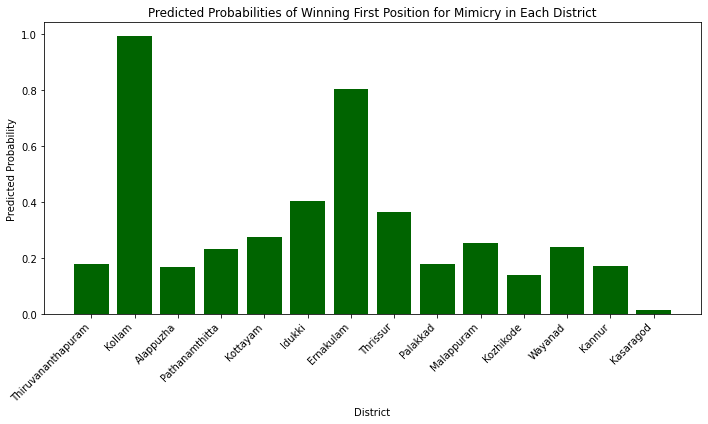

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.1799112554112554, 0.992, 0.16931562881562884, 0.2314682539682539, 0.2750465367965366, 0.40436038961038956, 0.8027103174603174, 0.3651190476190475, 0.17953679653679655, 0.2529484126984127, 0.13823989898989894, 0.23976190476190473, 0.17271645021645018, 0.013999999999999999]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='darkgreen')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Mimicry in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('mimicry.png')

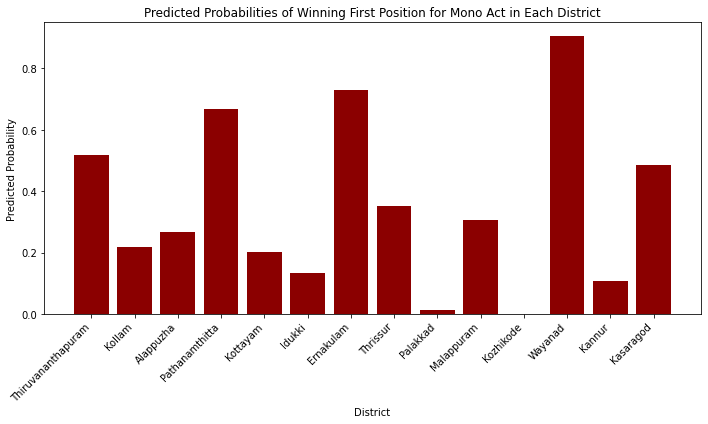

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.517361111111111, 0.2171118326118325, 0.26577380952380947, 0.6686726606726608, 0.2010717893217893, 0.13380747030747026, 0.7298452380952378, 0.3504227716727716, 0.013333333333333332, 0.3073906926406925, 0.0, 0.9039999999999999, 0.10765909090909091, 0.4848571428571429]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='darkred')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Mono Act in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('mono_act.png')

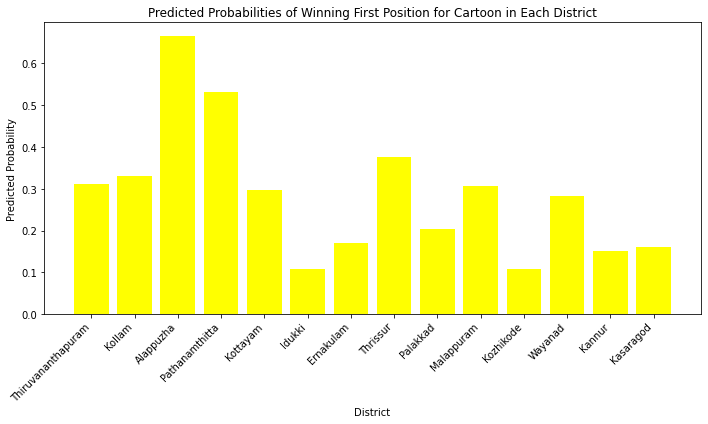

In [45]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.3106190476190476, 0.33021428571428557, 0.6646428571428571, 0.532, 0.29772763347763337, 0.10810317460317459, 0.16928571428571432, 0.3754047619047619, 0.2031706349206349, 0.3061717171717171, 0.10772222222222223, 0.28263095238095237, 0.14983766233766235, 0.16156349206349205]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='yellow')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Cartoon in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_cartoon.png')

# Show the plot
plt.show()


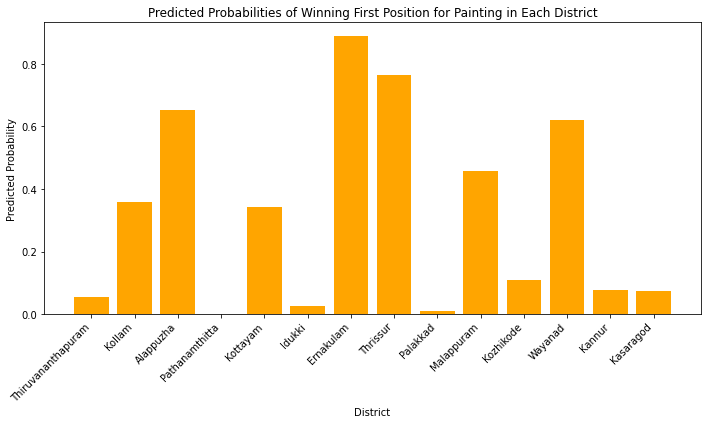

In [46]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.05466666666666667, 0.35710714285714296, 0.653781746031746, 0.0, 0.34175, 0.02625, 0.8884404761904762, 0.7642380952380953, 0.010428571428571428, 0.45807575757575747, 0.10984956709956709, 0.621, 0.07763528138528138, 0.07416666666666667]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='orange')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Painting in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_painting.png')

# Show the plot
plt.show()


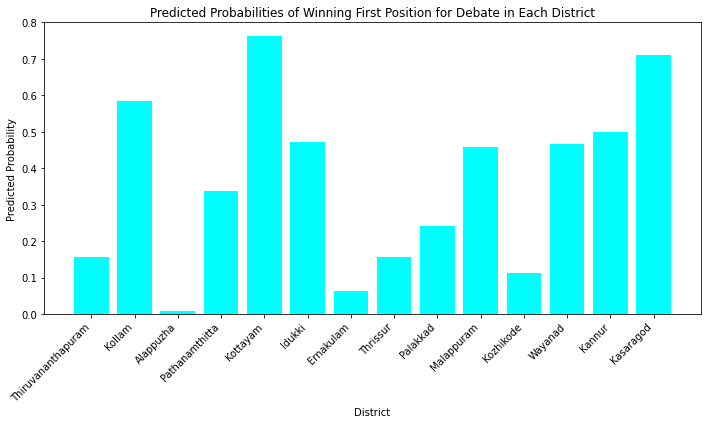

In [47]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.15636904761904763, 0.5845277777777779, 0.0075, 0.33785173160173165, 0.7620714285714285, 0.4707976190476191, 0.06395238095238094, 0.15592857142857144, 0.2415039682539682, 0.45783333333333337, 0.11216666666666665, 0.4678333333333333, 0.4993568376068375, 0.7095714285714285]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='cyan')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Debate in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_debate.png')

# Show the plot
plt.show()


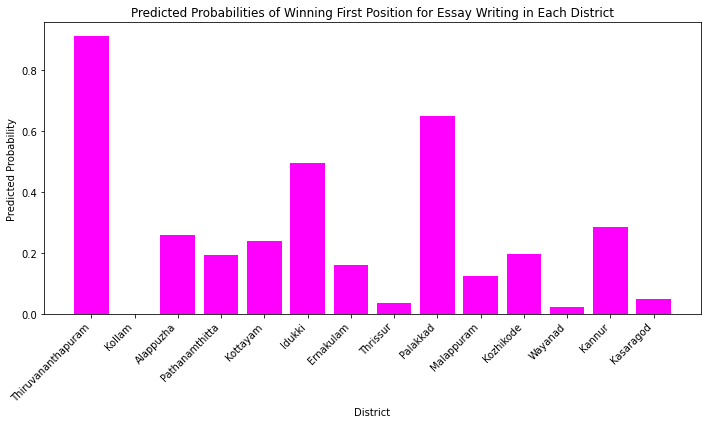

In [48]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.9112121212121213, 0.0, 0.25929761904761894, 0.19480891330891328, 0.24110064935064934, 0.494972582972583, 0.1610573593073593, 0.03490259740259741, 0.6510238095238094, 0.12430735930735931, 0.19820057720057715, 0.02261904761904762, 0.2866785714285713, 0.04833333333333334]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='magenta')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Essay Writing in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_essay_writing.png')

# Show the plot
plt.show()


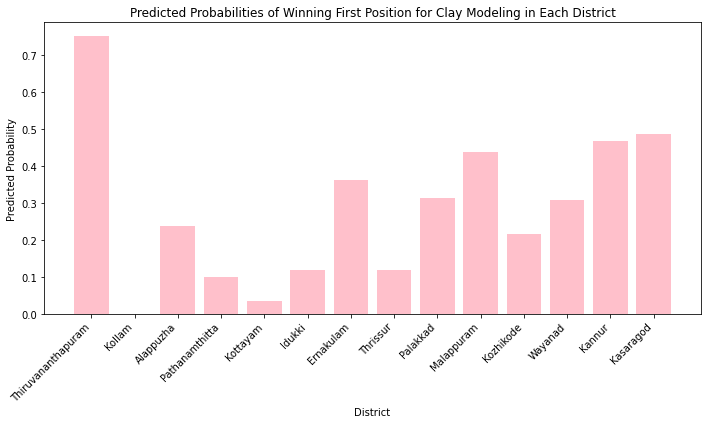

In [51]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.7512857142857143, 0.0, 0.23936111111111105, 0.10033333333333333, 0.035333333333333335, 0.11984523809523809, 0.3638809523809523, 0.1192012987012987, 0.31459126984126984, 0.43764718614718623, 0.21697619047619043, 0.30923809523809526, 0.4691666666666666, 0.4877103174603174]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='pink')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Clay Modeling in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_clay_modeling.png')

# Show the plot
plt.show()


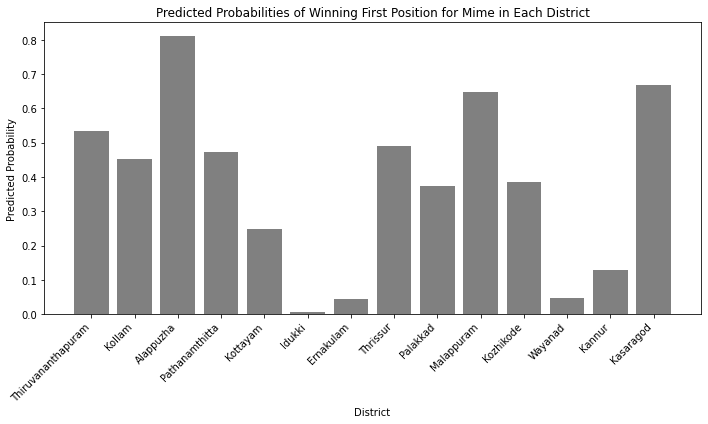

In [52]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.53259126984127, 0.4517777777777779, 0.8101785714285714, 0.47333333333333344, 0.2488650793650793, 0.0075, 0.043777777777777784, 0.48928571428571416, 0.37372619047619066, 0.6466666666666666, 0.386, 0.047380952380952385, 0.12882539682539684, 0.6671865079365079]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='grey')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Mime in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_mime.png')

# Show the plot
plt.show()


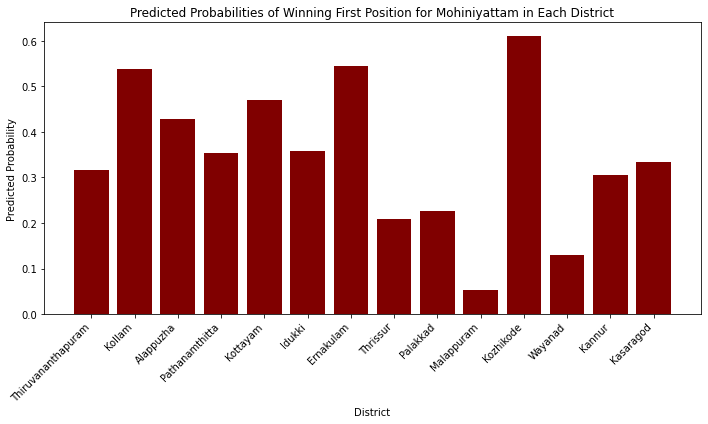

In [54]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.31716666666666665, 0.5385515873015873, 0.42877380952380956, 0.3540898268398269, 0.4710436507936508, 0.3589642857142856, 0.5451309523809524, 0.20793939393939392, 0.22620238095238096, 0.0525, 0.6097857142857142, 0.12976190476190474, 0.3046666666666666, 0.3341309523809525]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='maroon')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Mohiniyattam in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_mohiniyattam.png')

# Show the plot
plt.show()


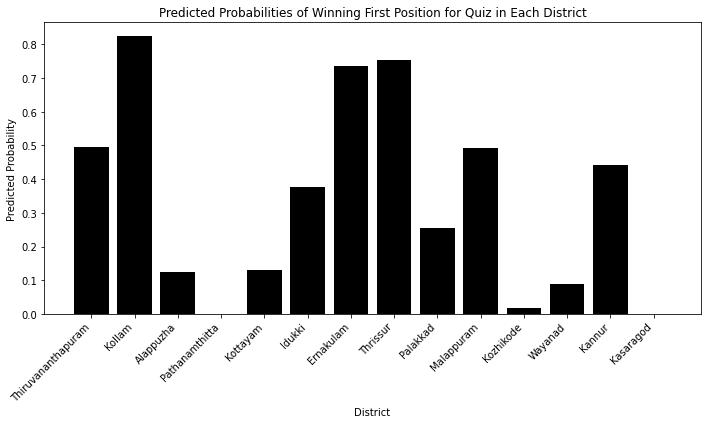

In [56]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.49533333333333324, 0.8237777777777778, 0.12499999999999999, 0.0, 0.13016666666666668, 0.3768293650793651, 0.7355238095238096, 0.7521814574314577, 0.2544920634920635, 0.4936190476190477, 0.018333333333333333, 0.09078571428571429, 0.4416948051948051, 0.0]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='black')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Quiz in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_quiz.png')

# Show the plot
plt.show()


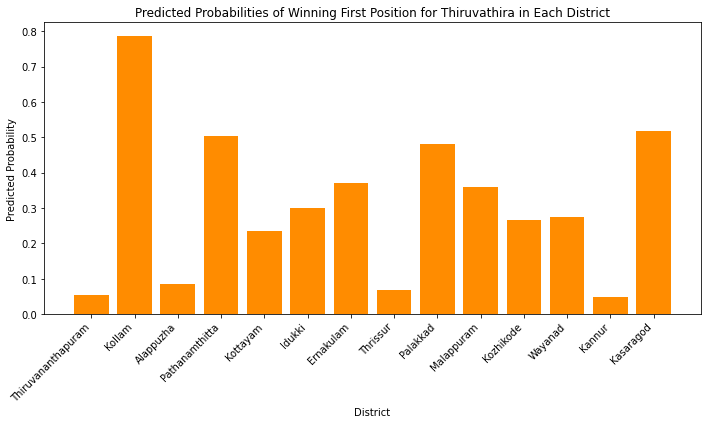

In [60]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.05416666666666666, 0.7856587301587302, 0.08641666666666667, 0.5037142857142858, 0.2359285714285714, 0.299392857142857, 0.3697023809523809, 0.06924999999999999, 0.48198809523809527, 0.3594285714285714, 0.26668925518925507, 0.27603571428571433, 0.04783333333333333, 0.5164852092352092]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='darkorange')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Thiruvathira in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_thiruvathira.png')

# Show the plot
plt.show()


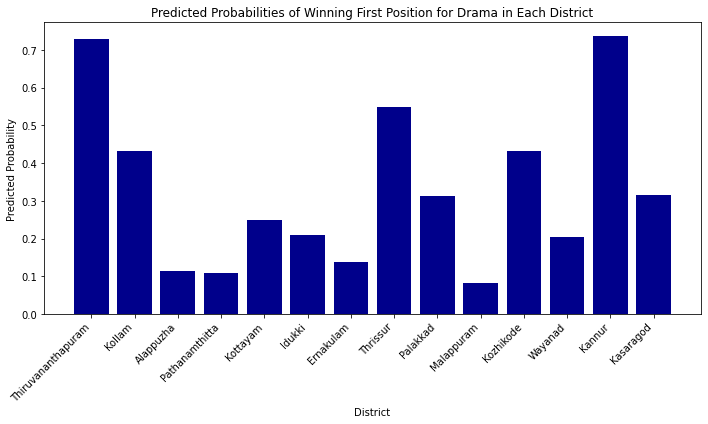

In [61]:
import matplotlib.pyplot as plt

# Data
districts = ['Thiruvananthapuram', 'Kollam', 'Alappuzha', 'Pathanamthitta', 'Kottayam', 'Idukki', 'Ernakulam', 'Thrissur', 'Palakkad', 'Malappuram', 'Kozhikode', 'Wayanad', 'Kannur', 'Kasaragod']
probabilities = [0.7301904761904763, 0.43097619047619057, 0.11404761904761906, 0.10766666666666666, 0.2501839826839826, 0.21012698412698408, 0.13901190476190475, 0.5498095238095239, 0.3125761183261182, 0.08371428571428571, 0.43304761904761896, 0.20424999999999993, 0.7361879509379512, 0.31472619047619044]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(districts, probabilities, color='darkblue')
plt.xlabel('District')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Winning First Position for Drama in Each District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('predicted_probabilities_drama.png')

# Show the plot
plt.show()
